Carrega as bases de treino e aplicação

Fonte:

https://pub.towardsai.net/random-forest-for-binary-classification-hands-on-with-scikit-learn-4909e29c29f5

https://towardsdatascience.com/converting-data-to-a-numeric-type-in-pandas-db9415caab0b

https://weka.sourceforge.io/doc.dev/weka/classifiers/trees/RandomForest.html

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')
#relatorios
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Mounted at /content/drive/


Tratamento de Dados
Coluna 1 = Dados String (tratada da seguimte forma M = 1, F = 2)

In [ ]:
#dft = pd.read_csv('drive/MyDrive/ColabFiles/DS_Census/census_treino.csv')
df = pd.read_csv('drive/MyDrive/ColabFiles/DS_Census/census.csv')
#df = pd.read_csv('drive/MyDrive/ColabFiles/DS_BreastCancer/breast-cancer.csv')

#tratamento de dados da coluna "sex"
def convert_col_sex(value):
  value = value.replace('Male','1').replace('Female','2')
  return float(value)
def convert_col_race(value):
  value = value.replace('White','1').replace('Black','2').replace('Asian-Pac-Islander','3').replace('Amer-Indian-Eskimo','4').replace('Other','5')
  return float(value)

df['sex'] = df['sex'].apply(convert_col_sex)
df['race'] = df['race'].apply(convert_col_race)
#df.value_counts("age")

#tratamento da coluna ""
#df
#df.describe()
#for col in df.columns:
#    print(col)
#print (df.value_counts("income"))
# print (df.value_counts("income"),
#        df.value_counts("workclass"),
#        df.value_counts("final-weight"),
#        df.value_counts("education"),
#        df.value_counts("education-num"),
#        df.value_counts("marital-status"),
#        df.value_counts("sex"),
#        df.value_counts("occupation"),
#        df.value_counts("relationship"),
#        df.value_counts("race"),
#        df.value_counts("sex"),
#        df.value_counts("capital-gain"),
#        df.value_counts("capital-loos"),
#        df.value_counts("hour-per-week"),
#        df.value_counts("native-country"),
#        )

# print (df.value_counts("income"),
#        df.value_counts("workclass"), #não             
#        df.value_counts("marital-status"), #SIM        
#        df.value_counts("occupation"),  #SIM    
#        df.value_counts("relationship"), #não
#        df.value_counts("race"), #SIM    
#        df.value_counts("sex"), #SIM    
#        df.value_counts("native-country"), #não
#        )
# print (df.value_counts("income"),
#        df.value_counts("race"),
#        df.value_counts("sex"),
#        df.value_counts("marital-status"),
#        )



In [ ]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1.0,1.0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1.0,1.0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1.0,1.0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2.0,1.0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2.0,2.0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,1.0,2.0,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,1.0,1.0,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,1.0,2.0,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,1.0,1.0,0,0,20,United-States,<=50K


In [ ]:
df.describe()

,age,final-weight,education-num,race,sex,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1.145726,1.330795,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,0.352837,0.470506,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,1.000000,1.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,1.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,1.000000,2.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,2.000000,2.000000,99999.000000,4356.000000,99.000000


apresenta prévia da leitura do arquivo CSV com a tabulação encontrada

Aplica a formação das árvores da floresta e mostra graficamente

In [ ]:
print (df.value_counts("race"))

race
1.0    27816
2.0     3124
3.0     1039
4.0      311
5.0      271
dtype: int64


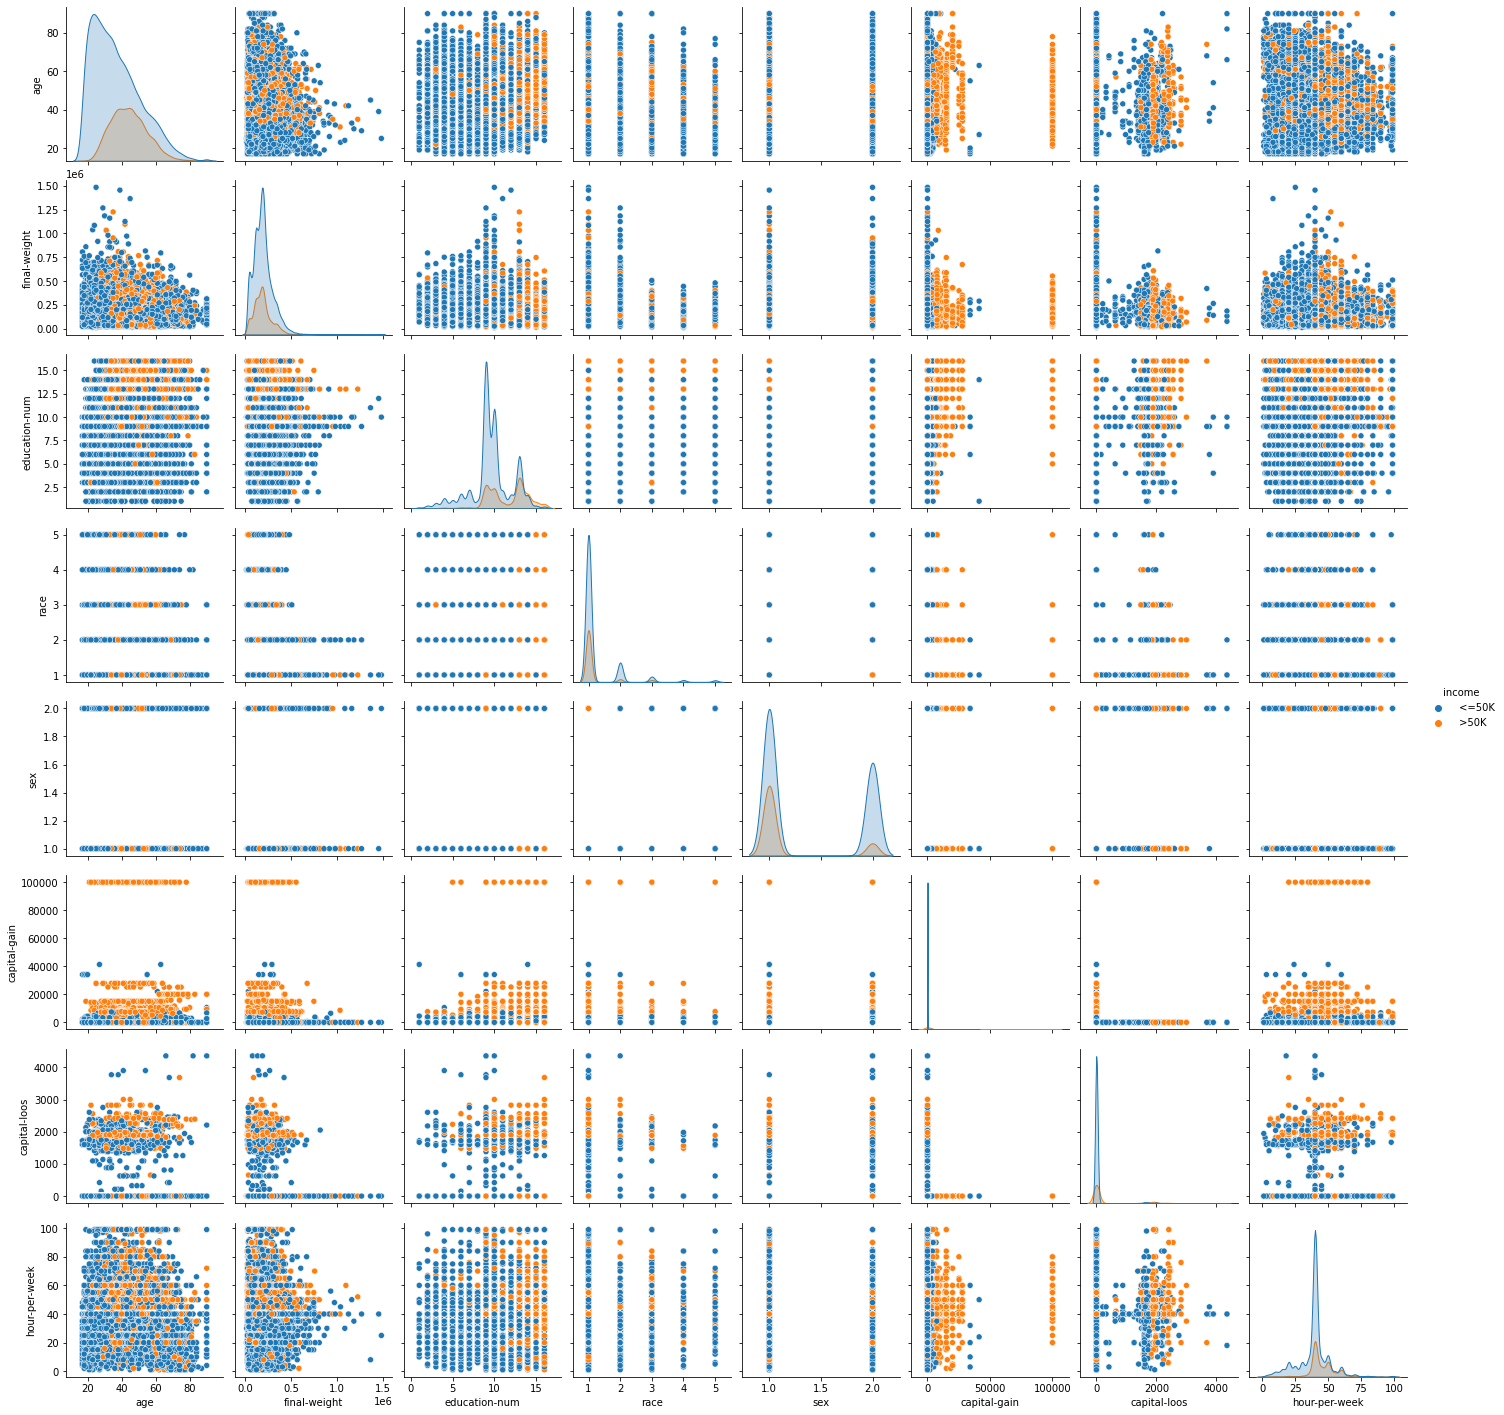

In [ ]:
#dft.describe()
#dft.value_counts("age")
#Explorando o dataset.
#plotagem de pares tipo scatter. Marcação de classe "income"
sns.pairplot(df, kind="scatter", hue="income")
plt.show()

Não explora a técnica redução de dimensionalidade

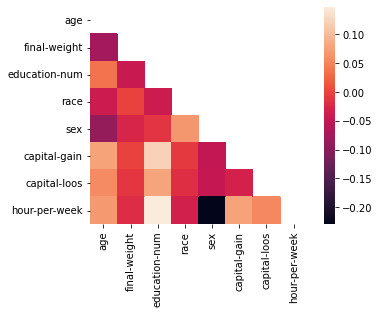

In [ ]:
#Drop the outcome:
df_corr = df.drop(["income"], axis=1)
#Build heatmap:
corr_matrix=df_corr.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=True)

In [ ]:
#lista as colunas totais
print("\n------------------COLUNAS (TODAS)-----------------------\n")
for col in df.columns:
    print(col)
    
#remove as colunas indesejadas
print("\n------------------COLUNAS (SELECIONADAS)-----------------------\n")
# REMOVER as colunas 
# workclass        
# marital-status     
# occupation 
# relationship
# native-country
df_final = df.drop(["workclass"], axis=1).drop(["marital-status"], axis=1).drop(["occupation"], axis=1).drop(["relationship"], axis=1).drop(["native-country"], axis=1).drop(["education"], axis=1)
#lista as colunas totais
for col in df_final.columns:
    print(col)


------------------COLUNAS (TODAS)-----------------------

age
workclass
final-weight
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loos
hour-per-week
native-country
income

------------------COLUNAS (SELECIONADAS)-----------------------

age
final-weight
education-num
race
sex
capital-gain
capital-loos
hour-per-week
income


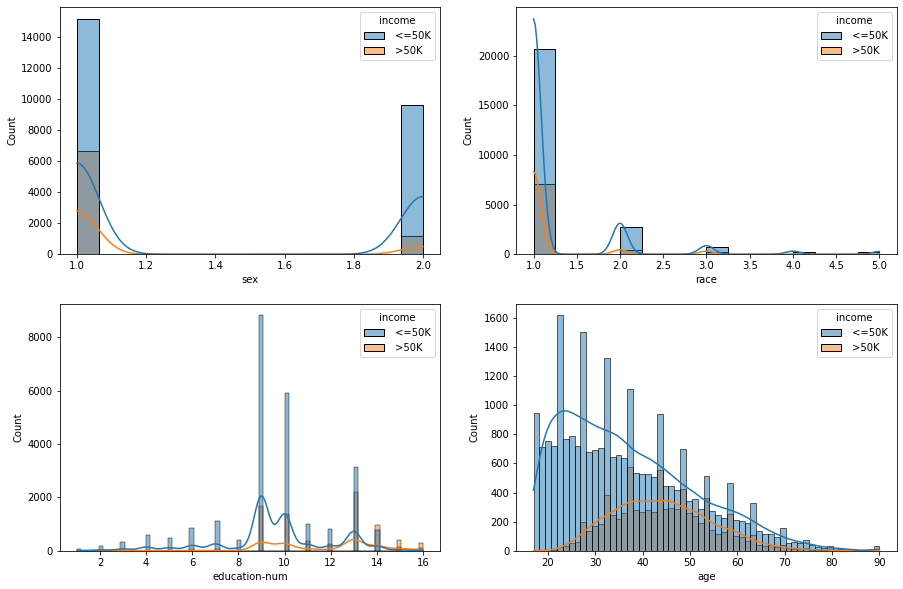

In [ ]:
#apresenta um histograma para o dataset selecionado (amostra)
#Define a saída com 6 linhas, 5 colunas e com imagem tamanho 15x10: 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#4 histogramas
#categóricos para numeros
sns.histplot(data=df_final, x="sex", hue="income", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_final, x="race", hue="income", kde=True, color="skyblue", ax=axs[0, 1])
#numéricos puros
sns.histplot(data=df_final, x="education-num", hue="income", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df_final, x="age", hue="income", kde=True, color="skyblue", ax=axs[1, 1])

#Print the final result:
plt.show()

We can use the same technique for box-plot:




In [ ]:
#define classe e features:
y = np.array(df_final['income'])
X = df_final.drop('income', axis=1)
# 20% da base como treino e 80% como aplicação:
X_test, X_train, y_test, y_train,  = train_test_split(X, y, test_size = 0.20)
#cria o modelo:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
#Evaluate the model:
print("Acurácia conjuntos de treino foi de: %f" % random_forest.score(X_train, y_train))
print("Acurácia sobre o conjunto de teste foi: %f" % random_forest.score(X_test, y_test))

Acurácia conjuntos de treino foi de: 0.999693
Acurácia sobre o conjunto de teste foi: 0.820946


In [ ]:
#Importância das características:
random_forest.feature_importances_

array([0.22434117, 0.27849941, 0.14082222, 0.01723262, 0.04201112,
       0.13777064, 0.04532177, 0.11400105])

In [ ]:
# Faça as predições
results = random_forest.predict(X_test)
predicao = pd.DataFrame({'classes': results })
#predicao
print ( predicao.value_counts('classes') )

classes
 <=50K    21204
 >50K      4844
dtype: int64


# Contagem total

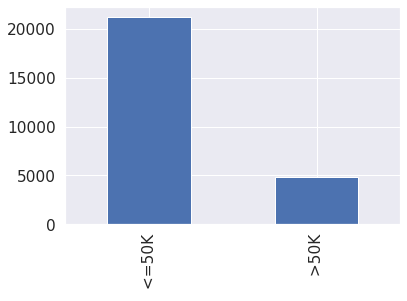

In [ ]:
predicao['classes'].value_counts().plot(kind='bar');

# Percentual

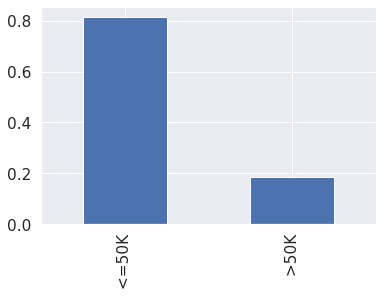

In [ ]:
predicao['classes'].value_counts(normalize=True).plot(kind='bar');

(0.0, 1.0)

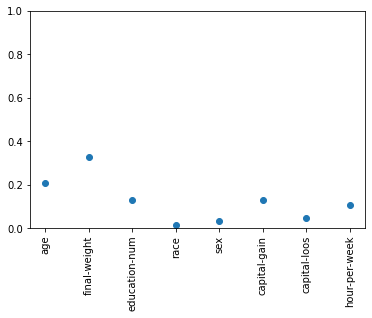

In [ ]:
#Apresentação gráfica das importâncias:
import matplotlib.pyplot as plt
plt.plot(random_forest.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylim(0, 1)